<a href="https://colab.research.google.com/github/didierr2/hf-learn/blob/main/Text_Splitter_T5_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Langchain

https://www.youtube.com/watch?v=W_yGjKLcViA
https://github.com/Coding-Crashkurse/Text-Splitters


In [ ]:
!pip install semantic-text-splitter langchain_community -q langchain

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

loader = TextLoader("/content/bank_fr.txt")
docs = loader.load()

In [ ]:
MIN_TOKENS = 100
MAX_TOKENS = 1000

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=0
)

In [ ]:
docs = text_splitter.split_documents(docs)
print(len(docs))

21


In [ ]:
for i, doc in enumerate(docs):
    print(f"CHUNK {i+1}: ", doc)

### Semantic text splitter

In [ ]:
with open("/content/bank_fr.txt", "r", encoding="utf-8") as file:
    content = file.read()

In [ ]:
from semantic_text_splitter import CharacterTextSplitter

max_characters = 200
splitter = CharacterTextSplitter(trim_chunks=False)
chunks_no_model_basic = splitter.chunks(content, max_characters)
chunks_no_model = splitter.chunks(content, chunk_capacity=(MIN_TOKENS, MAX_TOKENS))

In [ ]:
len(chunks_no_model_basic)

23

In [ ]:
for i, chunk in enumerate(chunks_no_model):
    print(f"CHUNK {i+1}: ", chunk)

In [ ]:
from semantic_text_splitter import HuggingFaceTextSplitter
from tokenizers import Tokenizer

max_tokens = 200
tokenizer = Tokenizer.from_pretrained("bert-base-multilingual-cased")
#tokenizer = Tokenizer.from_pretrained("jpohhhh/embeddings_from_msmarco-MiniLM-L-6-v3")
splitter = HuggingFaceTextSplitter(tokenizer, trim_chunks=False)

In [ ]:
chunks = splitter.chunks(content, max_tokens)

In [ ]:
for i, chunk in enumerate(chunks):
    print(f"CHUNK {i+1}: ", chunk)

In [ ]:
chunks_with_model = splitter.chunks(content, chunk_capacity=(MIN_TOKENS, MAX_TOKENS))

In [ ]:
len(chunks_with_model)

6

In [ ]:
for i, chunk in enumerate(chunks_with_model):
    print(f"CHUNK {i+1}: ", chunk)

In [ ]:
from semantic_text_splitter import HuggingFaceTextSplitter
from tokenizers import Tokenizer

max_tokens = 400
tokenizer = Tokenizer.from_pretrained("nomic-ai/nomic-embed-text-v1-unsupervised")
splitter = HuggingFaceTextSplitter(tokenizer, trim_chunks=False)

In [ ]:
chunks_model_nomic = splitter.chunks(content, chunk_capacity=(MIN_TOKENS, MAX_TOKENS))

In [ ]:
len(chunks_model_nomic)

7

In [ ]:
for i, chunk in enumerate(chunks_model_nomic):
    print(f"CHUNK {i+1}: ", chunk)

In [ ]:
!pip install sentence-transformers
!pip install einops

### How good are the embeddings based on the sematic-text-splitter?

In [ ]:
from sentence_transformers import SentenceTransformer
embeddings = SentenceTransformer("nomic-ai/nomic-embed-text-v1-unsupervised", trust_remote_code=True)

In [ ]:
embeddings_no_model_basic = [ embeddings.encode(chunk) for chunk in chunks_no_model_basic]
embeddings_no_model = [ embeddings.encode(chunk) for chunk in chunks_no_model]
embeddings_with_model = [ embeddings.encode(chunk) for chunk in chunks_with_model]
embeddings_model_nomic = [ embeddings.encode(chunk) for chunk in chunks_model_nomic]
#question = embeddings.encode("Quelle est l'histoire et l'évolution de la Banque d'Elarian depuis sa fondation ?")

In [ ]:
question = embeddings.encode("Quelles sont les caractéristiques spéciales du restaurant Sapore di Mare et son plat signature ?")

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_no_model_basic = [cosine_similarity([question], [emb])[0][0] for emb in embeddings_no_model_basic]
cos_sim_no_model = [cosine_similarity([question], [emb])[0][0] for emb in embeddings_no_model]
cos_sim_with_model = [cosine_similarity([question], [emb])[0][0] for emb in embeddings_with_model]
cos_sim_model_nomic = [cosine_similarity([question], [emb])[0][0] for emb in embeddings_model_nomic]

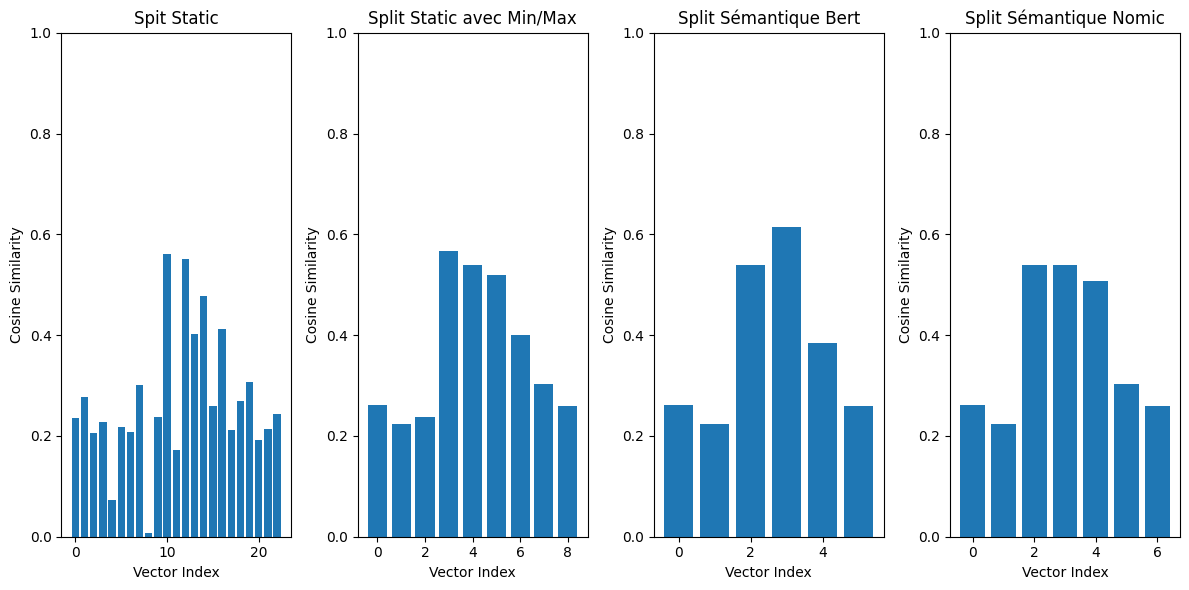

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.bar(range(len(cos_sim_no_model_basic)), cos_sim_no_model_basic)
plt.title('Spit Static')
plt.xlabel('Vector Index')
plt.ylabel('Cosine Similarity')
plt.ylim(0, 1)

plt.subplot(1, 4, 2)
plt.bar(range(len(cos_sim_no_model)), cos_sim_no_model)
plt.title('Split Static avec Min/Max')
plt.xlabel('Vector Index')
plt.ylabel('Cosine Similarity')
plt.ylim(0, 1)

plt.subplot(1, 4, 3)
plt.bar(range(len(cos_sim_with_model)), cos_sim_with_model)
plt.title('Split Sémantique Bert')
plt.xlabel('Vector Index')
plt.ylabel('Cosine Similarity')
plt.ylim(0, 1)

plt.subplot(1, 4, 4)
plt.bar(range(len(cos_sim_model_nomic)), cos_sim_model_nomic)
plt.title('Split Sémantique Nomic')
plt.xlabel('Vector Index')
plt.ylabel('Cosine Similarity')
plt.ylim(0, 1)


plt.tight_layout()
plt.savefig("image.png")
plt.show()

<Figure size 640x480 with 0 Axes>